## TASK: 
8. Load the MNIST dataset (introduced in Chapter 3), and split it into a training set, a
validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for
validation, and 10,000 for testing). Then train various classifiers, such as a random
forest classifier, an extra-trees classifier, and an SVM classifier. Next, try to
combine them into an ensemble that outperforms each individual classifier on the
validation set, using soft or hard voting. Once you have found one, try it on the test
set. How much better does it perform compared to the individual classifiers?
9. Run the individual classifiers from the previous exercise to make predictions on the
validation set, and create a new training set with the resulting predictions: each
training instance is a vector containing the set of predictions from all your
classifiers for an image, and the target is the image’s class. Train a classifier on this
new training set. Congratulations—you have just trained a blender, and together
with the classifiers it forms a stacking ensemble! Now evaluate the ensemble on
the test set. For each image in the test set, make predictions with all your
classifiers, then feed the predictions to the blender to get the ensemble’s
predictions. How does it compare to the voting classifier you trained earlier? Now
try again using a StackingClassifier instead. Do you get better performance? If
so, why?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X = mnist.data
y = mnist.target

In [3]:
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

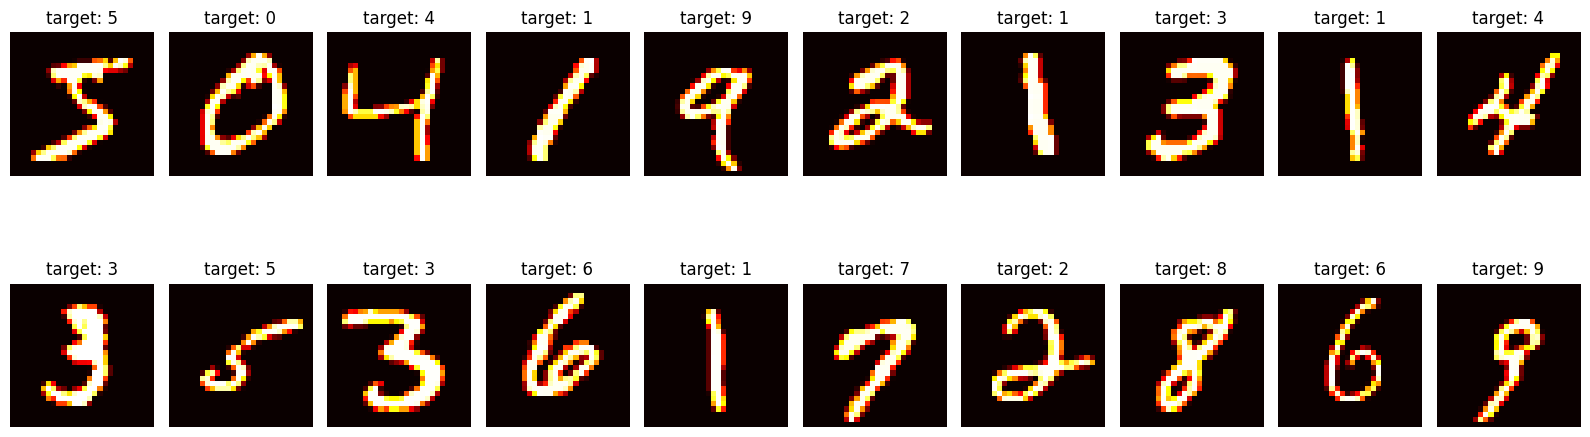

In [4]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(X[i].reshape(28, 28), cmap='hot');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train = X[:50000]
X_test = X[50000:60000]
X_val = X[60000:70000]
y_train = y[:50000]
y_test = y[50000:60000]
y_val = y[60000:70000]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ran_f = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200, random_state=42)

ran_f = ran_f.fit(X_train, y_train)

y_pred = ran_f.predict(X_val)
accuracy_score(y_val, y_pred)

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

ext_t = ExtraTreesClassifier(random_state=42)

ext_t = ext_t.fit(X_train, y_train)

y_pred = ext_t.predict(X_val)
accuracy_score(y_val, y_pred)

0.9703

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(random_state=42)

svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_val)
accuracy_score(y_val, y_pred)

import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(svc, f)

print("Model saved to 'model.pkl'")

Model saved to 'model.pkl'


In [18]:
estimators = [ran_f, ext_t, svc]

X_valid_predictions = np.empty((len(X_val), len(estimators)), dtype=object)

for index, estimator in enumerate([ran_f, ext_t, svc]):
    X_valid_predictions[:, index] = estimator.predict(X_val)

In [19]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True,
                                            random_state=42)
rnd_forest_blender.fit(X_valid_predictions, y_val)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [20]:
rnd_forest_blender.oob_score_

0.9757

In [21]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=object)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [22]:
y_pred = rnd_forest_blender.predict(X_test_predictions)
accuracy_score(y_test, y_pred)

0.9797

In [23]:
from sklearn.ensemble import StackingClassifier
X_train_full, y_train_full = X[:60_000], y[:60_000]

stack_clf = StackingClassifier(estim,
                               final_estimator=rnd_forest_blender)
stack_clf.fit(X_train_full, y_train_full)

NameError: name 'estim' is not defined

In [5]:
stack_clf.score(X_test, y_test)

NameError: name 'stack_clf' is not defined

In [4]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(stack_clf, f)

print("Model saved to 'model.pkl'")

NameError: name 'stack_clf' is not defined